# Introduction

In order to successful knowledge discovery in databases (KDD), well-defined and formal methods should be applied for managing data.  Cross-industry standard process for data mining (CRISP-DM) model is a standard methodology, which includes six phases:
    1. Problem domain understanding
    2. Data Understanding
    3. Data Preparation
    4. Modeling
    5. Evaluation
    6. Deployment

----------------------------------------------------------------------------------------------------------------------

# Part 1 - Problem domain understanding

----------------------------------------------------------------------------------------------------------------------

# Part 2 - Data Exploration & Understanding

http://localhost:8888/notebooks/0-MyCollection/00-Sample/01-DataExploration.ipynb

## 1. Import Library and Define Common function

### 1.1. Import Library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import mutual_info_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# Configuration
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


### 1.2. Common Function

In [2]:
# Distribution plot

def analyse_continuous(df,var,target):
    df = df.copy()
    # df[var] = df[var].fillna(df[var].median())
    plt.figure(figsize=(20,5))
       
    # histogram
    plt.subplot(131)
    sns.distplot(df[var], bins=30)
    #sns.distplot(df[var],hist=True, kde=True,kde_kws={'shade': True, 'linewidth': 3})
    plt.title('Histogram')    
    
    # Q-Q plot
    plt.subplot(132)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.ylabel('Quantiles')    
    
    # boxplot
    plt.subplot(133)
    sns.boxplot(x=df[var])
    plt.title('Boxplot')
          
    # skewness and kurtosis
    print('Skewness: %f' % df[var].skew())
    print('Kurtosis: %f' % df[var].kurt())
    plt.show()

In [3]:
def Training_Preparation(df, cont_vars):
    num_df = df[cont_vars].copy()

    # scaling features
    from sklearn.preprocessing import MinMaxScaler
    numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(df[cont_vars]))
    numdf_norm.columns = num_df.columns
    
    # Define X & y
    X = numdf_norm
    y = df['Class']

    # Split to train and test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=90, stratify = y)
    
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('LDA',LinearDiscriminantAnalysis()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    # Test options and evaluation metric
    seed = 9
    scoring = 'recall_macro'

    # evaluate each model in turn
    results = {}
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state = seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results[name] = cv_results
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    results_df = pd.DataFrame(results)
    plt.figure(figsize=(16,8))
    sns.boxplot(data=results_df)
    plt.show()

In [4]:
from matplotlib.backends.backend_pdf import PdfPages


def DistributionComparison(all_df, selected_vars,name):
    colors = ['#3791D7','#D72626']

    # pdf = matplotlib.backends.backend_pdf.PdfPages(name + '.pdf')
    with PdfPages(name + '.pdf') as pdf_pages:
        for column in selected_vars:    
            fig = plt.figure(figsize=[8,4])
            plt.subplot(121)
            sns.boxplot(x='Class', y=column,data=all_df,palette=colors)
            plt.title(column, fontsize=12)
            plt.subplot(122)
            sns.kdeplot(all_df[all_df.Class==1][column], bw = 0.4, label = "Cancer", shade=True, color="#D72626", linestyle="--")
            sns.kdeplot(all_df[all_df.Class==0][column], bw = 0.4, label = "NoCancer", shade=True, color= "#3791D7", linestyle=":")
            plt.title(column, fontsize=12)   
            pdf_pages.savefig(fig)                                          
            plt.show()    

    # Write the PDF document to the disk
    #pdf_pages.close()

In [5]:
def ModelEvaluation(df, cont_vars):
    
    num_df = df[cont_vars].copy()

    # scaling features
    from sklearn.preprocessing import MinMaxScaler
    numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(df[cont_vars]))
    numdf_norm.columns = num_df.columns
    
    # Define X & y
    X = numdf_norm
    y = df['Class']

    # Split to train and test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90, stratify = y)
    
    # initialize models
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(kernel="linear")))
    models.append(('LSVC', SVC(kernel="rbf")))
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('GNB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('LGB',LGBMClassifier()))
    models.append(('ADA',AdaBoostClassifier()))
    models.append(('LDA',LinearDiscriminantAnalysis()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('NN',MLPClassifier()))
    models.append(('XGB',XGBClassifier()))
    
    for name,model in models:
        print(name)
        model.fit(X_train, y_train)
        
        print('==========================================================')
        print('Train set')
        y_train_pred = model.predict(X_train)
        print('Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_train, list(y_train_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_train,list(y_train_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_train, list(y_train_pred)))
  
        print('----------------------------------------------------------')
        print('Test set')
        y_test_pred = model.predict(X_test)
        print('Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_test, list(y_test_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_test,list(y_test_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'True'
        cm_df.columns.name = 'Predicted'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_test, list(y_test_pred)))
        print('==========================================================')
        

In [6]:
from sklearn.manifold import TSNE

def tsne_plot(X, y):
       
        
    # scaling features
    from sklearn.preprocessing import MinMaxScaler
    numdf_norm = pd.DataFrame(MinMaxScaler().fit_transform(X))
    numdf_norm.columns = X.columns
    
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(numdf_norm)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y == 0), 0], X_t[np.where(y == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='No cancer')
    plt.scatter(X_t[np.where(y == 1), 0], X_t[np.where(y == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Colon cancer')

    plt.legend(loc='best');
    plt.show();

In [7]:
# function to find upper and lower boundaries
# for normally distributed variables

def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [8]:
# function to find upper and lower boundaries
# for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [9]:
def find_uncorrelated_vars(cancer_df, selected_vars, threshold):

    corrmat = cancer_df[selected_vars].corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
    corrmat['MissingF1'] = corrmat.feature1.apply(lambda x:MissingPercentage(x))
    corrmat['MissingF2'] = corrmat.feature2.apply(lambda x:MissingPercentage(x))
    
    correlated_groups = corrmat[corrmat['corr'] > threshold]
    
    selected_vars = []
    remaining_vars = correlated_groups.feature1.unique()

    while(len(remaining_vars) > 0):
        feature = remaining_vars[0]
        correlated_block = correlated_groups[correlated_groups.feature1 == feature]
        min_ind = correlated_block[['MissingF2']].idxmin() 
        sel_var = correlated_block.feature2[min_ind].values[0]
        removed_vars = [var for var in list(correlated_block.feature2.values)]
        remaining_vars = [var for var in remaining_vars if var not in removed_vars]
        if sel_var not in selected_vars:
            selected_vars = selected_vars + [sel_var]   
    
    return selected_vars

In [10]:
def analyze_na_values(df, var, target):
    tmp_df = df.copy()
    print(target)
    
    # Make a variable that indicates 1 if the observation was missing or 0 otherwise
    tmp_df['Missing'] = np.where(df[var].isnull(),1,0)
    
    # Calculate the mean Price where the information is missing or present
    tmp_df =  pd.DataFrame(tmp_df.groupby([target,'Missing'])[target].count())
    tmp_df.columns = ['Count']
    tmp_df = tmp_df.reset_index()
    
    
    if(len(tmp_df[tmp_df[target] == 0] == 1)):
        tmp_df= tmp_df.append({target:0,'Missing':1,'Count':0}, ignore_index=True)

    if(len(tmp_df[tmp_df[target] == 1] == 1)):
        tmp_df= tmp_df.append({target:1,'Missing':1,'Count':0}, ignore_index=True)

    tmp_df.loc[0,'Per']= tmp_df.loc[0,'Count']/(tmp_df.loc[0:1,'Count'].sum())
    tmp_df.loc[1,'Per']= tmp_df.loc[1,'Count']/(tmp_df.loc[0:1,'Count'].sum())
    tmp_df.loc[2,'Per']= tmp_df.loc[2,'Count']/(tmp_df.loc[2:3,'Count'].sum())
    tmp_df.loc[3,'Per']= tmp_df.loc[3,'Count']/(tmp_df.loc[2:3,'Count'].sum())
    sns.barplot(x=target, y = 'Per', data=tmp_df, hue='Missing')
    plt.title(var)
    plt.show()

In [11]:
def CategoricalDistribution(df, var, target):
    df = df.copy()
    
    # Calculate the mean Price where the information is missing or present
    sns.countplot(x=var, data=df, hue=target)
    plt.title(var)
    plt.show()

In [12]:
def CreateDummyVar(df, categorical_list):
    objdf_new = df.copy()
    objdf_dummy =pd.DataFrame()
    i = 0
    for e in categorical_list:
        i = i + 1
        objdf_new[e] = e + '_' + objdf_new[e].astype(str)
        varname= e 
        df_temp = pd.get_dummies(objdf_new[varname], drop_first=True)
        objdf_dummy = pd.concat([objdf_dummy, df_temp], axis=1)
        
    return objdf_dummy

In [13]:
def MissingPercentage(x):
    return df[x].isnull().sum()/len(df)

## 2. Load raw data

In [14]:
df = pd.read_csv('NHANES-MultipleCycles_merged1.csv')
org_df = df.copy()

df = df[df.RIAGENDR==2]
print(df.shape)

df.head()

(35481, 799)


,SIALANG,WTINT2YR,DMDCITZN,WTMEC2YR,SIAINTRP,SIAPROXY,RIDAGEYR,DMDMARTL,RIDSTATR,MIALANG,FIAPROXY,SDMVPSU,MIAPROXY,RIAGENDR,DMDEDUC2,FIALANG,SEQN,SDMVSTRA,RIDAGEMN,RIDEXPRG,MIAINTRP,DMDYRSUS,DMDEDUC3,DMDHHSIZ,DMDFMSIZ,DMDHRGND,RIDEXMON,RIDRETH1,SDDSRVYR,INDFMPIR,FIAINTRP,MCQ160D,BPQ070,ACD040,MCQ025,IMQ011,PFQ061T,ALQ130,FSDAD,CDQ006,DPQ060,SMQ050U,DEQ034A,HUQ020,SMD100NI,DLQ010,DID250,PFQ061F,HSQ580,DIQ230,DPQ040,DPQ020,SXQ610,INQ012,SMQ710,FSD071,SXQ600,SMQ876,CDQ005,PFQ030,DEQ034C,DEQ038G,INQ020,RHD280,SMQ800,CDQ001,SMAQUEX2,HIQ260,PFQ061I,MCQ050,DLQ050,RHQ602U,FSD151,HSQ500,FSD111,HUQ071,PFQ051,SMQ690F,DIQ350U,SMQ870,HIQ031B,INQ150,SMQ670,HIQ210,CDQ009A,MCQ160L,SMD100TR,SXQ590,PFQ041,PFQ061Q,SMDUPCA,BPQ100D,HIQ031A,SMQ856,MCQ160A,SMQ690D,HSQ571,DLQ040,DIQ180,SXD171,SXQ130,OCQ260,SMQ868,FSD032A,FSD032E,PFQ063D,FSDHH,SXQ251,FSQ162,DPQ050,BPQ080,SXQ270,OCQ210,CDQ009H,INQ090,SMD057,INDFMMPI,RHQ060,PFQ061S,SMD100FL,BPQ030,RHD143,RHQ420,HIQ011,SMQ690B,DPQ070,SMQ020,FSDCH,HSD010,SMQ050Q,SXD031,RHQ171,HIQ031I,RHQ291,DEQ034D,PFQ020,PFQ061D,MCQ053,SMQ880,DPQ100,HIQ031C,SMD100MN,MCQ230B,ALQ110,RHQ586U,MCQ160F,OCD270,SMQ690C,ALQ101,MCQ170L,FSD102,FSD032F,OCQ380,INQ140,RHQ166,OCD390G,HEQ040,SMQ770,CDQ009D,PUQ110,RHQ020,RHQ169,BPQ090D,MCQ080,SXQ265,OCD395,DLQ020,SLQ050,MCQ160M,DIQ080,PFQ061A,RHQ070,RHQ010,HIQ031AA,SMQ720,INQ060,RHQ131,BPQ020,HUQ030,BPQ040A,SMD100LN,DID060,PFQ049,DED031,ECD010,SMQ817,HSAQUEX,HIQ031F,MCQ300B,CDQ008,MCQ300A,INDFMMPC,DIQ360,DIQ050,PFQ061N,PUQ100,RHQ031,DLQ060,SMD641,FSD061,SMQ040,ECQ150,SMQ690A,FSD032C,PFQ090,DIQ010,IND235,RHQ576U,FSD122,PFQ061M,DLQ080,RHQ602Q,MCQ160G,DIQ260U,SMQ725,FSD032B,FSD052,PFQ061P,FSD146,DPQ080,HSQ590,RHQ160,PFQ061K,PFQ061C,PFQ063A,PFQ063E,MCQ160E,WHQ030E,ALQ120U,OCD150,MCQ230D,HEQ030,FSD132,ECQ090,DIQ170,PFQ061J,PFQ061O,CDQ009G,MCQ220,MCQ040,MCQ230A,SMQ840,SMQ872,DID350,MCQ080E,DID260,FSD141,DPQ030,HIQ031J,DIQ060U,RHQ596,SMQ874,MCQ149,MCQ300C,MCQ160C,SXQ272,RHQ554,FSD081,SMQ740,SXQ410,SXQ280,CDQ009C,SMD100CO,RHQ560U,SMQ860,SMD030,PFQ061R,RHQ576Q,MCQ230C,HIQ031E,RHQ540,HUQ090,CDQ003,MCQ092,PFQ063C,PFQ057,IMQ020,HSQ510,SXQ550,RHQ560Q,MCQ160K,SMD650,INQ030,INQ132,DID040,ECQ020,RHQ570,CDQ010,HEQ010,DPQ090,MCQ170M,PFQ061H,SMQ830,RHQ200,HUD080,ALQ120Q,BPQ050A,FSD032D,MCD093,PFQ063B,SMQ878,HEQ020,MCQ170K,CDQ002,MCQ010,SMQ858,PFQ061G,MCQ035,SMQ690E,ECQ080,HIQ105,HUQ010,RHQ580,FSD092,CDQ009F,SMD100BR,SMD630,PFQ059,PFQ061B,CDQ009B,CDQ004,CDQ009E,DPQ010,ECD070A,ECD070B,DIQ240,SXQ490,HSQ520,FSD041,BPQ060,HIQ270,INQ080,PFQ061L,PFQ054,SMD093,PFQ061E,HIQ031H,SXQ260,HIQ031D,SMQ866,OCQ180,MCQ160B,DIQ160,SMQ862,RHQ586Q,LBDSGLSI,URDTIME2,LBDSBUSI,LBDHDDSI,URDMNPLC,LBXHCG,LBDLYMNO,LBXSCA,PHQ060,URXMBP,LBDSCASI,URXMZP,URDFLOW2,ORXH51,ORXH64,LBXGLU,ORXHPC,LBXBGE,LBDHEG,LBXBPB,LBDWFL,LBDBCDSI,ORXGL,ORXH69,URXUMS,LBXSGL,LBXSOSSI,LBXIHG,URXMHH,LBDSALSI,URXVOL3,PHQ050,URXMHP,LBDHD,LBXHCR,ORXH62,URDTIME1,URDCNPLC,LBXSZN,LBXSKSI,LBDTHGSI,URXMIB,URDFLOW3,ORXHPV,URXMNP,LBXBCD,LBXSATSI,LBXSBU,ORXH11,LBDSTRSI,LBDSCRSI,ORXH73,LBXSUA,URXUTRI,ORXH26,ORXH31,LBDHBG,LBDSTPSI,PHASUPHR,ORXH82,LBXHE1,LBXSTR,ORXH53,ORXH58,URXVOL1,LBXLYPCT,URXVOL2,LBDSTBSI,LBDHEM,URXECP,LBDTCSI,LBXSCLSI,LBXSNASI,URDMZPLC,LBXSAL,PHAGUMHR,LBXNEPCT,PHQ020,LBXBGM,LBXHGB,ORXH35,ORXH84,LBXSTP,LBDIHGLC,URXCNP,LBXPLTSI,LBDIHGSI,URXPREG,LBDSIRSI,PHQ040,LBXSGTSI,LBDBGELC,PHAANTHR,ORXH68,LBXBAPCT,URDMEPLC,LBXSTB,ORXH81,LBXMCHSI,ORXGH,LBDNENO,LBXSCR,ORXH52,URDMBPLC,LBDSZNSI,ORXH56,LBXHE2,LBXMOPCT,LBXMPSI,ORXH61,LBDBGMLC,LBXSIR,PHAANTMN,PHACOFHR,URDECPLC,URDMOHLC,ORXH33,ORXH06,ORXHPI,LBDTHGLC,LBDSCUSI,LBDMONO,PHAALCMN,LBXRBCSI,URDMHPLC,URXUIO,LBDSUASI,LBDSPHSI,URDCOPLC,URXCRS,URDMC1LC,URXMEP,ORXH45,ORXH55,LBXMCVSI,ORXH71,LBXSCH,URXMC1,LBXGLT,LBDEONO,PHQ030,ORXH40,ORXH39,ORXH83,ORXH66,LBXHBC,ORXH72,WTSVS2YR,LBXSLDSI,LBXRDW,WTFSM,ORXH54,PHAGUMMN,ORXH70,LBXSGB,LBDBPBSI,URXUCL,LBDGLTSI,LBDWFLLC,WTSVOC2Y,URXCOP,LBDGLUSI,LBXSCU,LBXSSE,LBXWBCSI,LBDHDD,LBDSSESI,PHAALCHR,URDFLOW1,LBXHA,ORXH59,LBXSC3SI,LBXSPH,PHACOFMN,PHASUPMN,ORXH67,WTSOG2YR,ORXH42,URXUMA,LBXSAS

## 4. Target variable analysis

In [15]:
df[(df.MCQ230C.isna()== False) | (df.MCQ230D.isna()== False)].shape

(26, 799)

In [16]:
df = df[(df.MCQ230C.isna()) & (df.MCQ230D.isna())]
df.shape

(35455, 799)

In [17]:
df[(df['MCQ230A'] != 14) & (df['MCQ230B'] != 14) & (df.MCQ220 == 1)].shape

(1376, 799)

In [18]:
df = df[(df['MCQ230A'] == 14) | (df['MCQ230B'] == 14) | (df.MCQ220 == 2)]
df.shape

(19079, 799)

In [19]:
# no cancer group, excellent health
df['Class'] == 0

# breast cancer
df.loc[df.MCQ220 == 1,'Class'] = 1

df[df.Class == 1].shape[0]/df.shape[0],df[df.Class == 1].shape[0],df[df.Class == 0].shape[0]

(0.03165784370250013, 604, 18475)

In [20]:
# number of cancer <= 45 and num of cancer > 45
(df[(df.Class == 1) & (df.RIDAGEYR <= 45)].shape, df[(df.Class == 1) & (df.RIDAGEYR > 45)].shape)

((27, 799), (577, 799))

In [21]:
# number of no cancer <= 45 and num of no cancer > 45
(df[(df.Class == 0) & (df.RIDAGEYR <= 45)].shape, df[(df.Class == 0) & (df.RIDAGEYR > 45)].shape)

((8891, 799), (9584, 799))

In [22]:
df = df[df.RIDAGEYR > 45]
df.shape

(10161, 799)

In [23]:
pd.DataFrame([df[df.Class == 0].RIDAGEYR.describe(),df[df.Class == 1].RIDAGEYR.describe()],index=['NoCancer','Cancer'])

,count,mean,std,min,25%,50%,75%,max
NoCancer,9584.0,62.505426,10.700078,46.0,53.0,62.0,71.0,85.0
Cancer,577.0,68.532062,10.125914,46.0,61.0,70.0,79.0,85.0


In [24]:
df[df.Class == 1].shape[0]/df.shape[0],df[df.Class == 1].shape[0],df[df.Class == 0].shape[0]

(0.05678574943411081, 577, 9584)

In [25]:
df = df.reset_index(drop = True)
df.shape

(10161, 799)

## 4. Categorize vars

In [26]:
target = ['Class']

cont_vars = ['RIDAGEYR', 'RIDAGEMN', 'INDFMPIR', 'LBXSAL', 'LBDSGLSI', 'URDTIME2', 'LBDSBUSI', 'LBDHDDSI', 'LBDLYMNO', 'LBXSCA', 'URXMBP', 'LBDSCASI', 'URXMZP', 'URDFLOW2', 'LBXGLU', 'LBXBPB', 'LBDBCDSI', 'URXUMS', 'LBXSGL', 'LBXSOSSI', 'URXUAC', 'LBXIHG', 'URXMHH', 'URXMHP', 'URXUBA', 'WTFSM', 'URXUUR', 'URDTIME1', 'URXUSR', 'LBXSZN', 'URXUTU', 'LBXSKSI', 'URXUSN', 'URXUMMA', 'LBDTHGSI', 'URXMIB', 'URXUMO', 'URXMNP', 'LBXBCD', 'URXUDMA', 'LBXSATSI', 'LBXSBU', 'LBXV4C', 'LBDSTRSI', 'LBXVBZ', 'LBDSCRSI', 'LBXSUA', 'LBXVOX', 'URXUAS', 'URXUSB', 'LBDSTPSI', 'LBXVXY', 'LBXSTR', 'WTSA2YR', 'URXVOL1', 'LBXLYPCT', 'URXUTL', 'URXUPB', 'URXVOL2', 'PHAFSTMN', 'LBXVEB', 'URXECP', 'LBDTCSI', 'LBXNEPCT', 'LBXBGM', 'LBXHGB', 'LBXSTP', 'URXCNP', 'LBXPLTSI', 'LBDIHGSI', 'LBDSIRSI', 'LBXSGTSI', 'URXUCO', 'LBXBAPCT', 'LBXMCHSI', 'LBDNENO', 'LBXSCR', 'LBDSZNSI', 'LBXMOPCT', 'LBXMPSI', 'LBXVDB', 'LBXSIR', 'URXUCS', 'LBX2DF', 'URXUAB', 'LBDSCUSI', 'LBXRBCSI', 'URXUIO', 'LBDSUASI', 'LBDSPHSI', 'URXCRS', 'URXMEP', 'URXUCD', 'LBXMCVSI', 'URXUAS3', 'LBXSCH', 'URXMC1', 'LBXGLT', 'WTSVS2YR', 'LBXSLDSI', 'LBXRDW', 'PHAGUMMN', 'LBXSGB', 'LBDBPBSI', 'LBDGLTSI', 'WTSVOC2Y', 'URXCOP', 'LBDGLUSI', 'LBXSCU', 'LBXSSE', 'LBXWBCSI', 'LBDHDD', 'LBDSSESI', 'URDFLOW1', 'WTSAF2YR', 'LBXSPH', 'WTSOG2YR', 'URXUMA', 'LBXSASSI', 'LBXEOPCT', 'LBDSGBSI', 'LBXSAPSI', 'LBXTC', 'LBXMC', 'LBXTHG', 'LBDSCHSI', 'URXMOH', 'LBDSALSI', 'PHAFSTHR', 'DXDLAPF', 'DXDTRBMD', 'DXDSTBMC', 'DXXTRFAT', 'DXXHEFAT', 'DXDSTLE', 'DXXRALI', 'DXDTOFAT', 'DXDTOBMD', 'DXXLSBMC', 'DXXTRLI', 'DXDRATOT', 'BPXDI3', 'DXXHEA', 'DXDTOPF', 'DXDRLTOT', 'DXDTRPF', 'DXXLLBMD', 'DXXRLLI', 'BMXARMC', 'DXDRALE', 'DXXLLBMC', 'DXXLALI', 'DXXLRBMC', 'DXXPEA', 'DXDRAPF', 'BPXDI1', 'DXXPEBMD', 'DXDTRTOT', 'DXXRAA', 'DXDLLPF', 'BMXARML', 'DXXHELI', 'DXXRRA', 'DXDSTBMD', 'BPXDI4', 'DXXLLLI', 'DXDRLPF', 'BPXDI2', 'DXXLSBMD', 'BPXPLS', 'DXDTOBMC', 'DXDTOLE', 'DXXLRBMD', 'DXDTRLE', 'DXXHEBMC', 'DXDSTTOT', 'DXXRLA', 'BMXLEG', 'BPXSY1', 'DXXLAA', 'DXXLABMC', 'DXDLALE', 'DXDTRA', 'BMXWT', 'DXXTSBMC', 'DXXLLA', 'DXXLLFAT', 'DXDTOLI', 'BMXHT', 'DXXLABMD', 'DXDSTLI', 'DXXRRBMD', 'DXXLSA', 'DXDSTA', 'DXDTRBMC', 'DXXRABMC', 'DXDHELE', 'DXDHETOT', 'DXXHEBMD', 'DXDTOA', 'DXXRABMD', 'DXDRLLE', 'DXXLRA', 'DXXRRBMC', 'BPXSY2', 'DXDLLLE', 'DXXTSBMD', 'BMXBMI', 'DXDSTFAT', 'DXXRLFAT', 'DXXRLBMD', 'DXXRAFAT', 'DXDLATOT', 'BMXWAIST', 'DXDLLTOT', 'DXDSTPF', 'DXDHEPF', 'DXXLAFAT', 'DXXRLBMC', 'BPXSY3', 'BPXSY4', 'DXXTSA', 'DXXPEBMC', 'DXDTOTOT']
print(len(cont_vars))

dis_vars = ['DMDYRSUS', 'DMDEDUC2', 'DMDHHSIZ', 'DMDFMSIZ', 'BPXML1', 'BPACSZ', 'FCX10DI', 'FCX11DI', 'FCX06DI', 'FCX08DI', 'FCX07DI', 'FCX09DI', 'LBXBGE', 'URXVOL3', 'URXUAS5', 'URDFLOW3', 'LBXVTE', 'LBDSTBSI', 'URXUMN', 'LBXVTC', 'LBXSTB', 'PHAANTMN', 'PHAALCMN', 'PHACOFMN', 'PHASUPMN', 'URDTIME3', 'LBXV2A', 'LBXV1D', 'LBXVMC', 'LBXVNB', 'LBXV3B', 'LBXVCB', 'LBXVCT', 'LBDMONO', 'LBDEONO', 'LBDBANO', 'PHASUPHR', 'LBXSCLSI', 'LBXSNASI', 'PHAGUMHR', 'PHAANTHR', 'PHACOFHR', 'PHAALCHR', 'LBXSC3SI']
print(len(dis_vars))

cat_vars = ['RIDRETH1', 'RIDEXMON', 'DMDCITZN', 'DMDMARTL', 'RIDEXPRG', 'URDMNPLC', 'PHQ060', 'ORXH51', 'ORXH64', 'ORXHPC', 'LBDHEG', 'ORXGL', 'ORXH69', 'PHQ050', 'LBDVCTLC', 'LBD2DFLC', 'LBXHCR', 'ORXH62', 'URDCNPLC', 'URDUSNLC', 'ORXHPV', 'LBDVTCLC', 'URDUA3LC', 'URDUTLLC', 'URDUTULC', 'URDUDALC', 'ORXH11', 'URDUCOLC', 'ORXH73', 'URXUTRI', 'ORXH26', 'ORXH31', 'LBDHBG', 'ORXH82', 'LBXHE1', 'ORXH53', 'ORXH58', 'URDUURLC', 'LBDHEM', 'URDMZPLC', 'URDUBALC', 'LBDVTELC', 'LBDV1DLC', 'PHQ020', 'LBDV3BLC', 'URDUACLC', 'URDUSBLC', 'ORXH35', 'ORXH84', 'LBDIHGLC', 'URXPREG', 'LBDV4CLC', 'PHQ040', 'URDUPBLC', 'LBDBGELC', 'URDUMMAL', 'URDUMNLC', 'ORXH68', 'URDUA5LC', 'URDMEPLC', 'ORXH81', 'LBDVOXLC', 'ORXGH', 'LBDVCBLC', 'LBDVBZLC', 'ORXH52', 'URDMBPLC', 'ORXH56', 'LBXHE2', 'ORXH61', 'LBDBGMLC', 'URDECPLC', 'URDUCDLC', 'LBDVNBLC', 'URDMOHLC', 'ORXH33', 'ORXH06', 'ORXHPI', 'LBDTHGLC', 'URDUMOLC', 'LBDVXYLC', 'URDMHPLC', 'URDCOPLC', 'URDMC1LC', 'ORXH45', 'ORXH55', 'ORXH71', 'PHQ030', 'LBDVMCLC', 'URDUSRLC', 'ORXH40', 'ORXH39', 'ORXH83', 'ORXH66', 'LBXHBC', 'LBDVDBLC', 'LBDVEBLC', 'ORXH72', 'ORXH54', 'ORXH70', 'URDUCSLC', 'URXUCL', 'LBDV2ALC', 'LBDWFLLC', 'URDUABLC', 'LBXHA', 'ORXH59', 'ORXH67', 'ORXH42', 'ORXH18', 'URDMHHLC', 'PHDSESN', 'URDMIBLC', 'ORXH16', 'LBXHBS', 'LBXHCG', 'OHARNF', 'OHAPOS', 'BMIARML', 'OHDDESTS', 'OHAROCGP', 'OHX23TC', 'BPAEN2', 'OHAROCOH', 'OHAROCDE', 'OHX02TC', 'OHX30TC', 'OHXIMP', 'OHX14TC', 'OHAROTH', 'BMDSTATS', 'OHX16TC', 'OHX05TC', 'BMIARMC', 'BPAEN3', 'OHX26TC', 'OHAREC', 'BPAARM', 'OHAROCCI', 'BMILEG', 'BPAEN4', 'OHX01TC', 'BMXRECUM', 'OHX09TC', 'BMIHT', 'BPXCHR', 'OHX32TC', 'OHX18TC', 'OHDRCSTS', 'BPXPTY', 'BMXHEAD', 'OHX19TC', 'OHX15TC', 'OHDEXSTS', 'OHAROCDT', 'BMIHEAD', 'BMIRECUM', 'OHX03TC', 'BPXPULS', 'OHX17TC', 'BMIWT', 'BPAEN1', 'OHX31TC', 'OHX08TC', 'BMIWAIST', 'DXARLBV', 'DXALLBV', 'DXARABV', 'FCX10DI', 'OHX06TC', 'DXALABV', 'DXARLTV', 'OHX04TC', 'OHX12TC', 'FCX08DI', 'OHX27TC', 'OHX13TC', 'DXAHEBV', 'OHX22TC', 'OHX10TC', 'OHX29TC', 'OHX21TC', 'FCX07DI', 'OHX28TC', 'OHX07TC', 'FCX09DI', 'DXARATV', 'OHX24TC', 'PEASCCT1', 'DXALLTV', 'OHX25TC', 'OHX11TC', 'DXAHETV', 'DXAEXSTS']      
print(len(cat_vars))

224
44
194


## 6. Final dataset

In [27]:
HC_df = df.groupby(['HSD010','Class'])['Class'].count().unstack()
HC_df['Percentage_0'] = df[df.Class == 0].groupby(['HSD010'])['HSD010'].count()/df[df.Class==0].shape[0]
HC_df['Percentage_1'] = df[df.Class == 1].groupby(['HSD010'])['HSD010'].count()/df[df.Class==1].shape[0]

HC_df

Class,0,1,Percentage_0,Percentage_1
HSD010,,,,
1.0,596.0,22.0,0.062187,0.038128
2.0,1941.0,147.0,0.202525,0.254766
3.0,3310.0,197.0,0.345367,0.341421
4.0,2098.0,111.0,0.218907,0.192374
5.0,436.0,42.0,0.045492,0.072790
9.0,2.0,NaN,0.000209,NaN


In [28]:
df = df[df.HSD010 < 4]
df = df[((df.Class == 0) & (df.HSD010 < 3)) | (df.Class== 1)]

df.shape, df[df.Class == 1].shape, df[df.Class == 0].shape

((2903, 799), (366, 799), (2537, 799))

## 5. Check missing data of all features

In [29]:
all_vars = cont_vars+dis_vars+cat_vars
miss_df = pd.DataFrame(df[all_vars].isnull().sum(),columns=['Count'])
miss_df['Percentage'] = 100 * df[all_vars].isnull().sum()/len(df)
miss_df = miss_df.sort_values('Percentage', ascending=True)
miss_df = miss_df.reset_index()
miss_df.columns = ['Feature','Count','Percentage']
miss_df.head()

,Feature,Count,Percentage
0,RIDAGEYR,0,0.0
1,BMDSTATS,0,0.0
2,DMDMARTL,0,0.0
3,RIDEXMON,0,0.0
4,RIDRETH1,0,0.0


### Mann U Whitney test 

In [30]:
import scipy

ttest_df = pd.DataFrame(columns = ['Feature','FeatureName','t-stats','p-value','Skew','Kurtosis'])
ttest_df['Feature'] = cont_vars + dis_vars
ttest_df['FeatureName'] = cont_vars + dis_vars

df0 = df[df['Class'] == 0]
df1 = df[df['Class'] == 1]

for var in cont_vars + dis_vars:
    result = scipy.stats.ranksums(df0[df0[var].isna()==False][var], df1[df1[var].isna()==False][var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
    ttest_df.loc[ttest_df['Feature'] == var,'Skew'] = df[var].skew()
    ttest_df.loc[ttest_df['Feature'] == var,'Kurtosis'] = df[var].kurt()
  
ttest_df['abs_tstats'] = np.abs(ttest_df['t-stats'])
ttest_df = ttest_df.sort_values(['abs_tstats'], ascending = False)
ttest_df = ttest_df.merge(miss_df, left_on = 'Feature',right_on='Feature',how='inner')

ttest_df

,Feature,FeatureName,t-stats,p-value,Skew,Kurtosis,abs_tstats,Count,Percentage
0,RIDAGEYR,RIDAGEYR,-10.4024,2.41838e-25,0.169227,-1.15567,10.4024,0,0.000000
1,RIDAGEMN,RIDAGEMN,-6.67115,2.5381e-11,0.214931,-1.02841,6.67115,1775,61.143645
2,LBXLYPCT,LBXLYPCT,5.77229,7.82009e-09,0.46378,1.17866,5.77229,96,3.306924
3,LBXSOSSI,LBXSOSSI,-5.35762,8.43275e-08,-0.381261,4.52146,5.35762,129,4.443679
4,LBDSUASI,LBDSUASI,-5.22877,1.70641e-07,0.728258,0.861264,5.22877,129,4.443679
5,LBXSUA,LBXSUA,-5.22877,1.70641e-07,0.728288,0.86095,5.22877,129,4.443679
6,LBXSAL,LBXSAL,5.13968,2.75211e-07,-0.260504,0.647443,5.13968,129,4.443679
7,LBDSALSI,LBDSALSI,5.13968,2.75211e-07,-0.260504,0.647443,5.13968,129,4.443679
8,LBDSGLSI,LBDSGLSI,-4.86966,1.1179e-06,4.78565,33.5117,4.86966,129,4.443679
9,LBXSGL,LBXSGL,-4.86966,1.1179e-06,4.78576,33.5142,4.86966,129,4.443679


# Part 3: Data Preprocessing

## 1. Numerical vars

### 1.1. Handling missing values

In [31]:
num_vars = cont_vars+dis_vars

miss_num_df = pd.DataFrame(df[num_vars].isnull().sum(),columns=['Count'])
miss_num_df['Percentage'] = 100 * df[num_vars].isnull().sum()/len(df)
miss_num_df = miss_num_df.sort_values('Percentage', ascending=False)
miss_num_df.tail()

,Count,Percentage
BMXWT,22,0.757837
DMDFMSIZ,0,0.000000
DMDHHSIZ,0,0.000000
DMDEDUC2,0,0.000000
RIDAGEYR,0,0.000000


#### Select cont vars with missing value <= 30%

In [32]:
num_vars = list(miss_num_df[miss_num_df.Percentage <= 20].index)
print(len(num_vars))
print(num_vars)

91
['LBDTHGSI', 'LBXBCD', 'LBDBCDSI', 'LBDBPBSI', 'LBXBPB', 'LBXTHG', 'INDFMPIR', 'BPXDI1', 'BPXSY1', 'BPXSY3', 'BPXDI3', 'BPXSY2', 'BPXDI2', 'LBXSLDSI', 'LBXSASSI', 'LBXSATSI', 'LBXSC3SI', 'LBDSIRSI', 'LBDSTBSI', 'LBXSTB', 'LBXSCA', 'LBXSIR', 'LBDSCASI', 'LBXSKSI', 'LBDSTRSI', 'LBXSTR', 'LBXSCLSI', 'LBDSTPSI', 'LBDSPHSI', 'LBDSUASI', 'LBXSUA', 'LBDSGLSI', 'LBXSAL', 'LBDSBUSI', 'LBXSNASI', 'LBXSCR', 'LBXSGTSI', 'LBDSCRSI', 'LBXSCH', 'LBDSCHSI', 'LBXSGL', 'LBDSALSI', 'LBXSBU', 'LBXSAPSI', 'LBDSGBSI', 'LBXSTP', 'LBXSOSSI', 'LBXSPH', 'LBXSGB', 'LBDHDD', 'LBXTC', 'LBDHDDSI', 'LBDTCSI', 'BMXWAIST', 'BMXLEG', 'LBDMONO', 'LBDEONO', 'LBXLYPCT', 'LBDBANO', 'LBDLYMNO', 'LBXNEPCT', 'LBDNENO', 'LBXBAPCT', 'LBXEOPCT', 'LBXMOPCT', 'LBXHGB', 'LBXRBCSI', 'LBXWBCSI', 'LBXPLTSI', 'LBXMCVSI', 'LBXRDW', 'LBXMPSI', 'LBXMCHSI', 'LBXMC', 'BMXARMC', 'BMXARML', 'BPXML1', 'BPACSZ', 'BPXPLS', 'URXCRS', 'URXUMA', 'URXUMS', 'PHAFSTMN', 'PHAFSTHR', 'BMXBMI', 'BMXHT', 'BMXWT', 'DMDFMSIZ', 'DMDHHSIZ', 'DMDEDUC2', 'RI

#### Remove observations with 40% of missing data

In [33]:
df['FeatureCount'] = df[num_vars].count(axis=1)
df['FeatureMissing'] = len(num_vars) - df['FeatureCount']
df['MissingPercentage'] = df.FeatureMissing/len(num_vars)
df[['FeatureMissing','MissingPercentage']].describe()

,FeatureMissing,MissingPercentage
count,2903.000000,2903.000000
mean,4.183948,0.045977
std,12.401837,0.136284
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,3.000000,0.032967
max,83.000000,0.912088


In [34]:
print(df[(df['MissingPercentage'] > 0.6) & (df['Class'] == 1)].shape)
df = df[df['MissingPercentage'] <= 0.6]
df = df.reset_index(drop=True)

df.shape, len(df[(df['Class'] == 1)])/len(df)

(22, 802)


((2821, 802), 0.12194257355547679)

#### Filling missing data 

In [35]:
for var in num_vars:
    df[var] = df[var].fillna(df[var].median())

### 1.2. Remove outliers

In [36]:
for var in num_vars:
    upper_boundary, lower_boundary = find_skewed_boundaries(df, var, 3.5)
    df.loc[df[var] <= lower_boundary,var] = lower_boundary
    df.loc[df[var] >= upper_boundary,var] = upper_boundary

### 1.3. Gaussian Transformation

In [37]:
from sklearn.preprocessing import quantile_transform

Gauss_transformed_vars = ['URDTIME1','URXVOL1','LBXTHG','LBDTHGSI','LBXSGTSI','URXCRS','URXUMS','URXUMA']

for var in Gauss_transformed_vars:
    df[var] = quantile_transform(np.array(df[var]).reshape(-1,1), n_quantiles=20, random_state=0, copy=True)

### 1.4. Only use sig cont vars 

In [38]:
import scipy

ttest_df = pd.DataFrame(columns = ['Feature','FeatureName','t-stats','p-value','Skew','Kurtosis'])
ttest_df['Feature'] = num_vars
ttest_df['FeatureName'] = num_vars

df0 = df[df['Class'] == 0]
df1 = df[df['Class'] == 1]

for var in num_vars:
    result = scipy.stats.ranksums(df0[df0[var].isna()==False][var], df1[df1[var].isna()==False][var])
    ttest_df.loc[ttest_df['Feature'] == var,'t-stats'] = result[0]
    ttest_df.loc[ttest_df['Feature'] == var,'p-value'] = result[1]
    ttest_df.loc[ttest_df['Feature'] == var,'Skew'] = df[var].skew()
    ttest_df.loc[ttest_df['Feature'] == var,'Kurtosis'] = df[var].kurt()
  
ttest_df['abs_tstats'] = np.abs(ttest_df['t-stats'])
ttest_df = ttest_df.sort_values(['abs_tstats'], ascending = False)
ttest_df = ttest_df.merge(miss_df, left_on = 'Feature',right_on='Feature',how='inner')

ttest_df

,Feature,FeatureName,t-stats,p-value,Skew,Kurtosis,abs_tstats,Count,Percentage
0,RIDAGEYR,RIDAGEYR,-10.0894,6.15494e-24,0.172149,-1.15074,10.0894,0,0.000000
1,LBXLYPCT,LBXLYPCT,5.74784,9.03894e-09,0.416257,0.817614,5.74784,96,3.306924
2,LBXSOSSI,LBXSOSSI,-5.35302,8.64992e-08,-0.158979,1.61056,5.35302,129,4.443679
3,LBXSUA,LBXSUA,-5.17733,2.25086e-07,0.742127,0.930993,5.17733,129,4.443679
4,LBDSUASI,LBDSUASI,-5.17733,2.25086e-07,0.742098,0.931312,5.17733,129,4.443679
5,LBDSALSI,LBDSALSI,5.09104,3.56109e-07,-0.26452,0.70972,5.09104,129,4.443679
6,LBXSAL,LBXSAL,5.09104,3.56109e-07,-0.26452,0.70972,5.09104,129,4.443679
7,LBDSGLSI,LBDSGLSI,-4.84336,1.2766e-06,1.58271,2.68529,4.84336,129,4.443679
8,LBXSGL,LBXSGL,-4.84054,1.29488e-06,1.57894,2.67022,4.84054,129,4.443679
9,LBDLYMNO,LBDLYMNO,4.77618,1.78655e-06,0.976198,1.78632,4.77618,96,3.306924


In [39]:
num_vars = list(ttest_df[ttest_df['p-value'] <= 0.05].sort_values(['abs_tstats'],ascending=False).Feature)
print(num_vars)
print(len(num_vars))

['RIDAGEYR', 'LBXLYPCT', 'LBXSOSSI', 'LBXSUA', 'LBDSUASI', 'LBDSALSI', 'LBXSAL', 'LBDSGLSI', 'LBXSGL', 'LBDLYMNO', 'LBDEONO', 'LBXSBU', 'LBDSBUSI', 'DMDHHSIZ', 'LBDSTPSI', 'LBXSTP', 'LBXNEPCT', 'LBXSTR', 'LBDSTRSI', 'DMDFMSIZ', 'LBXEOPCT', 'BPXDI1', 'URXUMS', 'URXUMA', 'BMXARML', 'BPXDI2', 'BPXML1', 'BPXSY2', 'LBXRDW', 'LBDHDDSI', 'LBDHDD', 'LBXSGTSI', 'BPXSY1', 'LBXSCR', 'LBDSCRSI', 'BMXWAIST', 'LBXPLTSI', 'LBDMONO', 'LBDTCSI', 'LBXTC', 'BPXSY3', 'LBXSCH', 'LBDSCHSI', 'LBXMOPCT', 'LBXSLDSI', 'BMXLEG', 'INDFMPIR', 'BPXDI3', 'LBXSKSI', 'BMXHT', 'LBXSNASI', 'BPACSZ', 'LBXSC3SI']
53


In [40]:
len(num_vars)

53

### 1.4. Remove features with high correlation

In [41]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = df[num_vars].corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)

corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat['MissingF1'] = corrmat.feature1.apply(lambda x:MissingPercentage(x))
corrmat['MissingF2'] = corrmat.feature2.apply(lambda x:MissingPercentage(x))
corrmat.head()

,feature1,feature2,corr,MissingF1,MissingF2
0,LBDSALSI,LBXSAL,1.0,0.0,0.0
1,LBXSAL,LBDSALSI,1.0,0.0,0.0
2,LBXSC3SI,LBXSC3SI,1.0,0.0,0.0
3,LBDMONO,LBDMONO,1.0,0.0,0.0
4,BPXDI2,BPXDI2,1.0,0.0,0.0


In [42]:
correlated_groups = corrmat[corrmat['corr'] > 0.90]
correlated_groups.head()

,feature1,feature2,corr,MissingF1,MissingF2
0,LBDSALSI,LBXSAL,1.0,0.0,0.0
1,LBXSAL,LBDSALSI,1.0,0.0,0.0
2,LBXSC3SI,LBXSC3SI,1.0,0.0,0.0
3,LBDMONO,LBDMONO,1.0,0.0,0.0
4,BPXDI2,BPXDI2,1.0,0.0,0.0


In [43]:
num_vars = []
remaining_vars = correlated_groups.feature1.unique()

while(len(remaining_vars) > 0):
    feature = remaining_vars[0]
    correlated_block = correlated_groups[correlated_groups.feature1 == feature]
    min_ind = correlated_block[['MissingF2']].idxmin() 
    sel_var = correlated_block.feature2[min_ind].values[0]
    removed_vars = [var for var in list(correlated_block.feature2.values)]
    remaining_vars = [var for var in remaining_vars if var not in removed_vars]
    if sel_var not in num_vars:
        num_vars = num_vars + [sel_var]    
    
print(num_vars)
len(num_vars)

['LBXSAL', 'LBXSC3SI', 'LBDMONO', 'BPXDI2', 'BPXSY2', 'LBXRDW', 'LBDHDDSI', 'LBXSGTSI', 'BPXSY1', 'LBXSCR', 'BMXWAIST', 'LBXPLTSI', 'LBDTCSI', 'URXUMA', 'LBXMOPCT', 'LBXSLDSI', 'BMXLEG', 'INDFMPIR', 'BPXDI3', 'LBXSKSI', 'BMXARML', 'LBXSNASI', 'LBXSBU', 'LBXLYPCT', 'LBXSOSSI', 'LBXSUA', 'LBDSGLSI', 'LBDLYMNO', 'LBDEONO', 'DMDHHSIZ', 'LBDSTPSI', 'LBXSTR', 'LBXEOPCT', 'BPXDI1', 'BMXHT', 'BPXML1', 'RIDAGEYR', 'BPACSZ']


38

### 1.5. Feature Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
df = df.reset_index(drop=True)

scaler = MinMaxScaler(feature_range = (0, 1))
selected_features = [var for var in df.columns if var not in ['Class']]

X_scaled = df[num_vars]
X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled))
X_scaled.columns = num_vars
print(X_scaled.shape)
X_scaled.head()

(2821, 38)


,LBXSAL,LBXSC3SI,LBDMONO,BPXDI2,BPXSY2,LBXRDW,LBDHDDSI,LBXSGTSI,BPXSY1,LBXSCR,BMXWAIST,LBXPLTSI,LBDTCSI,URXUMA,LBXMOPCT,LBXSLDSI,BMXLEG,INDFMPIR,BPXDI3,LBXSKSI,BMXARML,LBXSNASI,LBXSBU,LBXLYPCT,LBXSOSSI,LBXSUA,LBDSGLSI,LBDLYMNO,LBDEONO,DMDHHSIZ,LBDSTPSI,LBXSTR,LBXEOPCT,BPXDI1,BMXHT,BPXML1,RIDAGEYR,BPACSZ
0,0.208333,0.437500,0.333333,0.625000,0.333333,0.829932,0.358382,0.657895,0.352941,0.409639,0.461053,0.991628,0.482467,0.503759,0.233918,0.834043,0.598291,0.898,0.377778,0.549618,0.525316,0.437500,0.457143,0.116279,0.526786,0.269663,0.999190,0.208333,0.181818,0.000000,0.212121,0.281564,0.059701,0.562500,0.506224,0.479167,0.358974,0.75
1,0.875000,0.437500,0.500000,0.812500,0.458333,0.204082,0.641618,0.925493,0.426471,0.489960,0.436842,0.453953,0.650544,0.298246,0.561404,0.476596,0.534188,1.000,0.888889,0.549618,0.715190,0.437500,0.628571,0.260174,0.508929,0.528090,0.459919,0.208333,0.363636,0.181818,0.545455,0.498324,0.388060,0.812500,0.753112,0.520833,0.384615,0.75
2,0.291667,0.479167,0.500000,0.541667,0.291667,0.285714,0.312139,0.042105,0.323529,0.248996,0.176842,0.522791,0.325272,0.307018,0.567251,0.336170,0.589744,0.234,0.555556,0.458015,0.430380,0.354167,0.257143,0.452035,0.348214,0.235955,0.396761,0.416667,0.181818,0.181818,0.333333,0.239106,0.218905,0.416667,0.365145,0.437500,0.769231,0.50
3,0.541667,0.562500,0.333333,0.500000,0.291667,0.176871,0.141618,0.315789,0.279412,0.489960,0.378947,0.507907,0.397823,0.591093,0.368421,0.353191,0.619658,0.460,0.533333,0.671756,0.537975,0.604167,0.457143,0.531977,0.598214,0.516854,0.459919,0.437500,0.181818,0.000000,0.181818,0.281564,0.218905,0.541667,0.448133,0.437500,0.358974,0.75
4,0.458333,0.479167,0.333333,0.645833,0.569444,0.816327,0.378613,0.315789,0.573529,0.248996,0.326316,0.435349,0.547763,0.800708,0.263158,0.468085,0.495726,0.624,0.733333,0.335878,0.227848,0.479167,0.314286,0.218023,0.455357,0.325843,0.351417,0.312500,0.363636,0.181818,0.272727,0.241341,0.199005,0.583333,0.155602,0.687500,0.692308,0.50


In [45]:
scaled_df = pd.concat([X_scaled, df.Class],axis =1)
scaled_df.to_csv('BreastCancer_LogisticRegression.csv',index=False)

In [46]:
scaled_df.head()

,LBXSAL,LBXSC3SI,LBDMONO,BPXDI2,BPXSY2,LBXRDW,LBDHDDSI,LBXSGTSI,BPXSY1,LBXSCR,BMXWAIST,LBXPLTSI,LBDTCSI,URXUMA,LBXMOPCT,LBXSLDSI,BMXLEG,INDFMPIR,BPXDI3,LBXSKSI,BMXARML,LBXSNASI,LBXSBU,LBXLYPCT,LBXSOSSI,LBXSUA,LBDSGLSI,LBDLYMNO,LBDEONO,DMDHHSIZ,LBDSTPSI,LBXSTR,LBXEOPCT,BPXDI1,BMXHT,BPXML1,RIDAGEYR,BPACSZ,Class
0,0.208333,0.437500,0.333333,0.625000,0.333333,0.829932,0.358382,0.657895,0.352941,0.409639,0.461053,0.991628,0.482467,0.503759,0.233918,0.834043,0.598291,0.898,0.377778,0.549618,0.525316,0.437500,0.457143,0.116279,0.526786,0.269663,0.999190,0.208333,0.181818,0.000000,0.212121,0.281564,0.059701,0.562500,0.506224,0.479167,0.358974,0.75,0
1,0.875000,0.437500,0.500000,0.812500,0.458333,0.204082,0.641618,0.925493,0.426471,0.489960,0.436842,0.453953,0.650544,0.298246,0.561404,0.476596,0.534188,1.000,0.888889,0.549618,0.715190,0.437500,0.628571,0.260174,0.508929,0.528090,0.459919,0.208333,0.363636,0.181818,0.545455,0.498324,0.388060,0.812500,0.753112,0.520833,0.384615,0.75,1
2,0.291667,0.479167,0.500000,0.541667,0.291667,0.285714,0.312139,0.042105,0.323529,0.248996,0.176842,0.522791,0.325272,0.307018,0.567251,0.336170,0.589744,0.234,0.555556,0.458015,0.430380,0.354167,0.257143,0.452035,0.348214,0.235955,0.396761,0.416667,0.181818,0.181818,0.333333,0.239106,0.218905,0.416667,0.365145,0.437500,0.769231,0.50,0
3,0.541667,0.562500,0.333333,0.500000,0.291667,0.176871,0.141618,0.315789,0.279412,0.489960,0.378947,0.507907,0.397823,0.591093,0.368421,0.353191,0.619658,0.460,0.533333,0.671756,0.537975,0.604167,0.457143,0.531977,0.598214,0.516854,0.459919,0.437500,0.181818,0.000000,0.181818,0.281564,0.218905,0.541667,0.448133,0.437500,0.358974,0.75,0
4,0.458333,0.479167,0.333333,0.645833,0.569444,0.816327,0.378613,0.315789,0.573529,0.248996,0.326316,0.435349,0.547763,0.800708,0.263158,0.468085,0.495726,0.624,0.733333,0.335878,0.227848,0.479167,0.314286,0.218023,0.455357,0.325843,0.351417,0.312500,0.363636,0.181818,0.272727,0.241341,0.199005,0.583333,0.155602,0.687500,0.692308,0.50,1


In [47]:
scaled_df.shape

(2821, 39)

## 2. Categorical vars

### 2.1. Handling missing data

In [48]:
miss_cat_df = pd.DataFrame(df[cat_vars].isnull().sum(),columns=['Count'])
miss_cat_df['Percentage'] = 100 * df[cat_vars].isnull().sum()/len(df)
miss_cat_df = miss_cat_df.sort_values('Percentage', ascending=False)
miss_cat_df.tail()

,Count,Percentage
PHQ060,0,0.0
DMDMARTL,0,0.0
PHQ030,0,0.0
RIDEXMON,0,0.0
RIDRETH1,0,0.0


In [49]:
cat_vars = list(miss_cat_df[miss_cat_df.Percentage <= 5].index)
print(len(cat_vars))
print(cat_vars)

20
['BPAEN1', 'BPAEN3', 'LBXHA', 'BPAEN2', 'BPAARM', 'BPXPULS', 'BPXPTY', 'LBXHBS', 'LBXHBC', 'DMDCITZN', 'PHQ050', 'PHQ020', 'BMDSTATS', 'PHQ040', 'PHDSESN', 'PHQ060', 'DMDMARTL', 'PHQ030', 'RIDEXMON', 'RIDRETH1']


#### Filling missing data

In [50]:
for var in cat_vars:
    df[var] = df[var].fillna(-1)

### 2.2. Create dummy var

In [51]:
def CreateDummyVar(df, categorical_list):
    objdf_new = df.copy()
    objdf_dummy =pd.DataFrame()
    i = 0
    for e in categorical_list:
        i = i + 1
        objdf_new[e] = e + '_' + objdf_new[e].astype(str)
        varname= e 
        df_temp = pd.get_dummies(objdf_new[varname], drop_first=True)
        objdf_dummy = pd.concat([objdf_dummy, df_temp], axis=1)
        
    return objdf_dummy

In [52]:
dummy_df = CreateDummyVar(df, cat_vars)
dummy_vars = list(dummy_df.columns)

print(dummy_df.shape)
dummy_df.head()

(2821, 44)


,BPAEN1_1.0,BPAEN1_2.0,BPAEN3_1.0,BPAEN3_2.0,LBXHA_1.0,LBXHA_2.0,LBXHA_3.0,BPAEN2_1.0,BPAEN2_2.0,BPAARM_1.0,BPAARM_2.0,BPAARM_8.0,BPXPULS_1.0,BPXPULS_2.0,BPXPTY_1.0,BPXPTY_2.0,LBXHBS_1.0,LBXHBS_2.0,LBXHBC_1.0,LBXHBC_2.0,DMDCITZN_1.0,DMDCITZN_2.0,DMDCITZN_9.0,PHQ050_2.0,PHQ020_2.0,BMDSTATS_2.0,BMDSTATS_3.0,BMDSTATS_4.0,PHQ040_2.0,PHDSESN_1.0,PHDSESN_2.0,PHQ060_2.0,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,PHQ030_2.0,RIDEXMON_2.0,RIDRETH1_2,RIDRETH1_3,RIDRETH1_4,RIDRETH1_5
0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0
1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0
3,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0
4,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0


In [53]:
final_df = pd.concat([dummy_df, X_scaled,df[target]],1)
selected_vars = dummy_vars + num_vars
final_df.shape

(2821, 83)

In [54]:
final_df.head()

,BPAEN1_1.0,BPAEN1_2.0,BPAEN3_1.0,BPAEN3_2.0,LBXHA_1.0,LBXHA_2.0,LBXHA_3.0,BPAEN2_1.0,BPAEN2_2.0,BPAARM_1.0,BPAARM_2.0,BPAARM_8.0,BPXPULS_1.0,BPXPULS_2.0,BPXPTY_1.0,BPXPTY_2.0,LBXHBS_1.0,LBXHBS_2.0,LBXHBC_1.0,LBXHBC_2.0,DMDCITZN_1.0,DMDCITZN_2.0,DMDCITZN_9.0,PHQ050_2.0,PHQ020_2.0,BMDSTATS_2.0,BMDSTATS_3.0,BMDSTATS_4.0,PHQ040_2.0,PHDSESN_1.0,PHDSESN_2.0,PHQ060_2.0,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,PHQ030_2.0,RIDEXMON_2.0,RIDRETH1_2,RIDRETH1_3,RIDRETH1_4,RIDRETH1_5,LBXSAL,LBXSC3SI,LBDMONO,BPXDI2,BPXSY2,LBXRDW,LBDHDDSI,LBXSGTSI,BPXSY1,LBXSCR,BMXWAIST,LBXPLTSI,LBDTCSI,URXUMA,LBXMOPCT,LBXSLDSI,BMXLEG,INDFMPIR,BPXDI3,LBXSKSI,BMXARML,LBXSNASI,LBXSBU,LBXLYPCT,LBXSOSSI,LBXSUA,LBDSGLSI,LBDLYMNO,LBDEONO,DMDHHSIZ,LBDSTPSI,LBXSTR,LBXEOPCT,BPXDI1,BMXHT,BPXML1,RIDAGEYR,BPACSZ,Class
0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0.208333,0.437500,0.333333,0.625000,0.333333,0.829932,0.358382,0.657895,0.352941,0.409639,0.461053,0.991628,0.482467,0.503759,0.233918,0.834043,0.598291,0.898,0.377778,0.549618,0.525316,0.437500,0.457143,0.116279,0.526786,0.269663,0.999190,0.208333,0.181818,0.000000,0.212121,0.281564,0.059701,0.562500,0.506224,0.479167,0.358974,0.75,0
1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0.875000,0.437500,0.500000,0.812500,0.458333,0.204082,0.641618,0.925493,0.426471,0.489960,0.436842,0.453953,0.650544,0.298246,0.561404,0.476596,0.534188,1.000,0.888889,0.549618,0.715190,0.437500,0.628571,0.260174,0.508929,0.528090,0.459919,0.208333,0.363636,0.181818,0.545455,0.498324,0.388060,0.812500,0.753112,0.520833,0.384615,0.75,1
2,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0.291667,0.479167,0.500000,0.541667,0.291667,0.285714,0.312139,0.042105,0.323529,0.248996,0.176842,0.522791,0.325272,0.307018,0.567251,0.336170,0.589744,0.234,0.555556,0.458015,0.430380,0.354167,0.257143,0.452035,0.348214,0.235955,0.396761,0.416667,0.181818,0.181818,0.333333,0.239106,0.218905,0.416667,0.365145,0.437500,0.769231,0.50,0
3,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0.541667,0.562500,0.333333,0.500000,0.291667,0.176871,0.141618,0.315789,0.279412,0.489960,0.378947,0.507907,0.397823,0.591093,0.368421,0.353191,0.619658,0.460,0.533333,0.671756,0.537975,0.604167,0.457143,0.531977,0.598214,0.516854,0.459919,0.437500,0.181818,0.000000,0.181818,0.281564,0.218905,0.541667,0.448133,0.437500,0.358974,0.75,0
4,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0.458333,0.479167,0.333333,0.645833,0.569444,0.816327,0.378613,0.315789,0.573529,0.248996,0.326316,0.435349,0.547763,0.800708,0.263158,0.468085,0.495726,0.624,0.733333,0.335878,0.227848,0.479167,0.314286,0.218023,0.455357,0.325843,0.351417,0.312500,0.363636,0.181818,0.272727,0.241341,0.199005,0.583333,0.155602,0.687500,0.692308,0.50,1


----------------------------------------------------------------------------------------------------------------------

# Part 4: Feature Selection

----------------------------------------------------------------------------------------------------------------------

# Part 5: Predictive Model

## 5.1. Numerical vars

### Split data into X & y

In [55]:
X = X_scaled
y = df['Class']

### Split data into train and test set

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((2256, 38), (565, 38))

In [57]:
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.12189716312056738
0.12212389380530973


### Train Logistic Regression using statsmodel

In [58]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.Logit(y_train, X_train_const)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.330851
         Iterations 7


In [59]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                 2256
Model:                          Logit   Df Residuals:                     2217
Method:                           MLE   Df Model:                           38
Date:                Fri, 08 Jan 2021   Pseudo R-squ.:                  0.1075
Time:                        07:01:58   Log-Likelihood:                -746.40
converged:                       True   LL-Null:                       -836.27
Covariance Type:            nonrobust   LLR p-value:                 2.651e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2514      1.245     -1.808      0.071      -4.692       0.189
LBXSAL        -0.7587      0.657     -1.155      0.248      -2.047       0.529
LBXSC3SI       0.9697      0.778      1.247      0.212      -0.554       2.494
LBDMONO       -1.5646      1.428     -1.096      0.273      -4.364       1.234
BPXDI2        -0.3439      1.131     -0.304      0.761      -2.561       1.873
BPXSY2        -0.7259      1.080     -0.672      0.501      -2.842       1.390
LBXRDW         0.3846      0.455      0.845      0.398      -0.507       1.276
LBDHDDSI      -1.0760      0.738     -1.458      0.145      -2.523       0.371
LBXSGTSI       0.8293      0.262      3.160      0.002       0.315       1.344
BPXSY1         0.1443      1.037      0.139      0.889      -1.889       2.177
LBXSCR        -1.1244      0.543     -2.071      0.038      -2.189      -0.060
BMXWAIST      -2.2140      0.751     -2.948      0.003      -3.686      -0.742
LBXPLTSI      -1.1211      0.630     -1.780      0.075      -2.356       0.113
LBDTCSI       -0.0355      0.639     -0.056      0.956      -1.287       1.216
URXUMA         0.1311      0.258      0.509      0.611      -0.374       0.636
LBXMOPCT       1.6581      1.365      1.215      0.224      -1.016       4.333
LBXSLDSI       0.0352      0.614      0.057      0.954      -1.168       1.238
BMXLEG        -1.2767      0.715     -1.786      0.074      -2.678       0.124
INDFMPIR      -0.0254      0.239     -0.106      0.915      -0.494       0.443
BPXDI3         0.0487      1.000      0.049      0.961      -1.911       2.008
LBXSKSI        0.5608      0.639      0.877      0.380      -0.692       1.813
BMXARML        1.9336      0.741      2.608      0.009       0.480       3.387
LBXSNASI      -0.5484      2.878     -0.191      0.849      -6.190       5.093
LBXSBU         0.0743      0.968      0.077      0.939      -1.824       1.972
LBXLYPCT      -1.7527      1.615     -1.085      0.278      -4.918       1.413
LBXSOSSI       1.0752      3.577      0.301      0.764      -5.935       8.086
LBXSUA         1.3379      0.566      2.363      0.018       0.228       2.448
LBDSGLSI       0.4904      0.684      0.717      0.473      -0.850       1.831
LBDLYMNO      -1.1767      1.633     -0.720      0.471      -4.378       2.024
LBDEONO        2.1428      0.949      2.258      0.024       0.283       4.003
DMDHHSIZ      -0.1326      0.332     -0.400      0.689      -0.782       0.517
LBDSTPSI      -0.7670      0.570     -1.345      0.179      -1.884       0.350
LBXSTR         0.1077      0.500      0.216      0.829      -0.872       1.087
LBXEOPCT      -1.7941      1.105     -1.624      0.104      -3.960       0.372
BPXDI1         0.2392      0.889      0.269      0.788      -1.503       1.981
BMXHT         -0.2057      0.726     -0.283      0.777      -1.629       1.218
BPXML1        -0.4336      1.497     -0.290      0.772      -3.368       2.501
RIDAGEYR       1.9142      0.373      5.129      0.000       1.183       2.646
BP

In [60]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.107     
Dependent Variable: Class            AIC:              1570.7988 
Date:               2021-01-08 07:01 BIC:              1793.9314 
No. Observations:   2256             Log-Likelihood:   -746.40   
Df Model:           38               LL-Null:          -836.27   
Df Residuals:       2217             LLR p-value:      2.6506e-20
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -2.2514    1.2453  -1.8079  0.0706  -4.6921   0.1893
LBXSAL        -0.7587    0.6572  -1.1546  0.2483  -2.0467   0.5292
LBXSC3SI       0.9697    0.7777   1.2469  0.2124  -0.5545   2.4939
LBDMONO       -1.5646    1.4280  -1.0956  0.2732  -4.3635   1.2343
BPXDI2        -0.3439    1.1313  -0.3040  0.7611  -2.5613   1.8735
BPXSY2        -0.7259    1.0795  -0.6725  0.5013  -2.8417   1.3898
LBXRDW         0.3846    0.4550   0.8454  0.3979  -0.5071   1.2763
LBDHDDSI      -1.0760    0.7382  -1.4576  0.1449  -2.5228   0.3708
LBXSGTSI       0.8293    0.2625   3.1596  0.0016   0.3149   1.3437
BPXSY1         0.1443    1.0373   0.1391  0.8894  -1.8888   2.1774
LBXSCR        -1.1244    0.5429  -2.0710  0.0384  -2.1886  -0.0603
BMXWAIST      -2.2140    0.7511  -2.9476  0.0032  -3.6862  -0.7418
LBXPLTSI      -1.1211    0.6298  -1.7800  0.0751  -2.3556   0.1133
LBDTCSI       -0.0355    0.6385  -0.0556  0.9556  -1.2870   1.2160
URXUMA         0.1311    0.2578   0.5085  0.6111  -0.3741   0.6363
LBXMOPCT       1.6581    1.3646   1.2151  0.2243  -1.0164   4.3326
LBXSLDSI       0.0352    0.6139   0.0573  0.9543  -1.1681   1.2384
BMXLEG        -1.2767    0.7148  -1.7861  0.0741  -2.6777   0.1243
INDFMPIR      -0.0254    0.2392  -0.1063  0.9153  -0.4943   0.4434
BPXDI3         0.0487    0.9996   0.0487  0.9611  -1.9105   2.0080
LBXSKSI        0.5608    0.6391   0.8774  0.3803  -0.6919   1.8135
BMXARML        1.9336    0.7415   2.6077  0.0091   0.4803   3.3868
LBXSNASI      -0.5484    2.8785  -0.1905  0.8489  -6.1902   5.0933
LBXSBU         0.0743    0.9685   0.0767  0.9389  -1.8239   1.9724
LBXLYPCT      -1.7527    1.6149  -1.0853  0.2778  -4.9179   1.4125
LBXSOSSI       1.0752    3.5769   0.3006  0.7637  -5.9354   8.0857
LBXSUA         1.3379    0.5662   2.3631  0.0181   0.2282   2.4476
LBDSGLSI       0.4904    0.6840   0.7170  0.4734  -0.8502   1.8310
LBDLYMNO      -1.1767    1.6332  -0.7205  0.4712  -4.3778   2.0244
LBDEONO        2.1428    0.9490   2.2579  0.0240   0.2828   4.0029
DMDHHSIZ      -0.1326    0.3315  -0.3999  0.6892  -0.7823   0.5172
LBDSTPSI      -0.7670    0.5701  -1.3454  0.1785  -1.8843   0.3504
LBXSTR         0.1077    0.4998   0.2156  0.8293  -0.8718   1.0873
LBXEOPCT      -1.7941    1.1051  -1.6235  0.1045  -3.9599   0.3718
BPXDI1         0.2392    0.8889   0.2691  0.7878  -1.5030   1.9815
BMXHT         -0.2057    0.7262  -0.2833  0.7770  -1.6291   1.2176
BPXML1        -0.4336    1.4972  -0.2896  0.7721  -3.3680   2.5008
RIDAGEYR       1.9142    0.3732   5.1291  0.0000   1.1827   2.6456
BPACSZ         1.0295    0.5922   1.7384  0.0821  -0.1312   2.1903
=================================================================

"""

In [61]:
y_train_pred = result.predict(X_train_const)
y_test_pred = result.predict(X_test_const)

### Train and perform Cross Validation

In [62]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
kfold = KFold(n_splits = 10, random_state = 10)
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall_macro')
scores

array([0.5       , 0.4975    , 0.5       , 0.49752475, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ])

In [63]:
print("ROC AUC score: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std()))

ROC AUC score: 49.95% (+/- 0.10%)


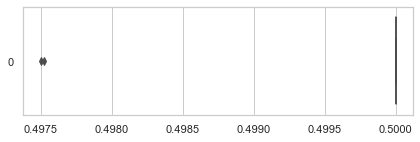

In [64]:
plt.figure(figsize=(7,2))
sns.boxplot(data=scores, orient='h')
plt.show()

### Train Logistic Regression using sklearn

#### Train model

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Prediction

In [66]:
y_train_pred = model.predict(X_train)
prob_train_pred = model.predict_proba(X_train)

y_test_pred = model.predict(X_test)
prob_test_pred = model.predict_proba(X_test)

#### Model Interpretation: intercept and coefficients 

In [67]:
model.intercept_

array([-2.42242295])

In [68]:
model.coef_

array([[-6.21876923e-01,  6.46998275e-01, -3.11493753e-01,
        -1.57884418e-01, -4.36126134e-01,  2.71663037e-01,
        -6.73141833e-01,  7.13767130e-01, -3.67047197e-02,
        -6.92070092e-01, -1.04475667e+00, -8.44474415e-01,
        -1.56443843e-01,  1.58607840e-01,  4.66966977e-01,
         1.05926623e-03, -7.20526570e-01, -6.48494737e-02,
        -5.55407159e-02,  3.30082922e-01,  1.09743985e+00,
         1.16126678e-01,  2.32803990e-01, -1.11068348e+00,
         2.90195355e-01,  9.60496321e-01,  5.23815736e-01,
        -1.33691695e+00,  8.16883368e-01, -1.60405845e-01,
        -5.86296265e-01,  2.21530379e-01, -2.76356705e-01,
         2.42883502e-02, -1.59075207e-01, -1.83418302e-01,
         1.72235413e+00,  6.17455722e-01]])

In [69]:
feature_names = X.columns.values
coefficient_list = list(model.coef_[0])
feature_coefficient = [(feature, coefficient) for feature, coefficient in zip(feature_names, coefficient_list) ]
feature_coefficient

[('LBXSAL', -0.6218769227976633),
 ('LBXSC3SI', 0.6469982749725055),
 ('LBDMONO', -0.3114937527337578),
 ('BPXDI2', -0.15788441797718078),
 ('BPXSY2', -0.43612613441895043),
 ('LBXRDW', 0.27166303665420305),
 ('LBDHDDSI', -0.6731418332049578),
 ('LBXSGTSI', 0.7137671304357788),
 ('BPXSY1', -0.03670471968393912),
 ('LBXSCR', -0.6920700915976346),
 ('BMXWAIST', -1.0447566733562996),
 ('LBXPLTSI', -0.8444744149464322),
 ('LBDTCSI', -0.15644384275759893),
 ('URXUMA', 0.15860784005276937),
 ('LBXMOPCT', 0.4669669770970909),
 ('LBXSLDSI', 0.0010592662336723318),
 ('BMXLEG', -0.7205265699808805),
 ('INDFMPIR', -0.06484947367215883),
 ('BPXDI3', -0.05554071586810518),
 ('LBXSKSI', 0.33008292166907116),
 ('BMXARML', 1.0974398459755141),
 ('LBXSNASI', 0.11612667817805737),
 ('LBXSBU', 0.232803989648814),
 ('LBXLYPCT', -1.110683475534959),
 ('LBXSOSSI', 0.2901953551042),
 ('LBXSUA', 0.9604963205547159),
 ('LBDSGLSI', 0.52381573638101),
 ('LBDLYMNO', -1.3369169508900771),
 ('LBDEONO', 0.8168833682

In [70]:
coefficient_list = np.abs(list(model.coef_[0]))
feature_importance = pd.DataFrame()
feature_importance['FeatureName'] = feature_names
feature_importance['Coef'] = model.coef_[0]
feature_importance['Abs_Coef'] = coefficient_list

feature_importance.sort_values(['Abs_Coef'],ascending = False)

,FeatureName,Coef,Abs_Coef
36,RIDAGEYR,1.722354,1.722354
27,LBDLYMNO,-1.336917,1.336917
23,LBXLYPCT,-1.110683,1.110683
20,BMXARML,1.097440,1.097440
10,BMXWAIST,-1.044757,1.044757
25,LBXSUA,0.960496,0.960496
11,LBXPLTSI,-0.844474,0.844474
28,LBDEONO,0.816883,0.816883
16,BMXLEG,-0.720527,0.720527
7,LBXSGTSI,0.713767,0.713767


#### Summary table

In [71]:
def LogisticSummaryTable(classifier, X):
    feature_name = X.columns.values
    summary_table = pd.DataFrame(columns = ['FeatureName'], data = feature_name)
    summary_table['Coefficient'] = np.transpose(classifier.coef_)
    summary_table.index = summary_table.index + 1
    summary_table.loc[0] = ['Intercept', classifier.intercept_[0]]
    summary_table = summary_table.sort_index()
    summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
    summary_table = summary_table.sort_values('Odds_ratio', ascending = False)
    
    return summary_table

In [72]:
LogisticSummaryTable(model, X_train)

,FeatureName,Coefficient,Odds_ratio
37,RIDAGEYR,1.722354,5.597691
21,BMXARML,1.097440,2.996485
26,LBXSUA,0.960496,2.612993
29,LBDEONO,0.816883,2.263435
8,LBXSGTSI,0.713767,2.041668
2,LBXSC3SI,0.646998,1.909800
38,BPACSZ,0.617456,1.854204
27,LBDSGLSI,0.523816,1.688458
15,LBXMOPCT,0.466967,1.595149
20,LBXSKSI,0.330083,1.391083


#### Accuracy

In [73]:
print('Train: ',accuracy_score(y_train, y_train_pred))
print('Test: ', accuracy_score(y_test, y_test_pred))

Train:  0.8781028368794326
Test:  0.8778761061946903


#### Confusion Matrix & Classification Report

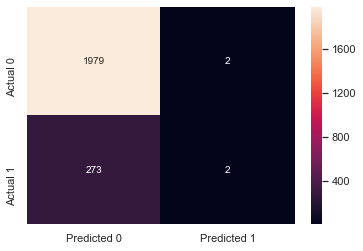

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
sns.heatmap(cm_df, annot = True, fmt="d")
plt.show()

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1981
           1       0.50      0.01      0.01       275

    accuracy                           0.88      2256
   macro avg       0.69      0.50      0.47      2256
weighted avg       0.83      0.88      0.82      2256



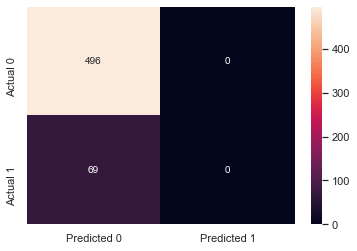

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

In [77]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       496
           1       0.00      0.00      0.00        69

    accuracy                           0.88       565
   macro avg       0.44      0.50      0.47       565
weighted avg       0.77      0.88      0.82       565



#### ROC AUC Score

In [78]:
print(roc_auc_score(y_train, prob_train_pred[:,1]))
print(roc_auc_score(y_test, prob_test_pred[:,1]))

0.7344940571795695
0.7048854604955587


In [79]:
print(roc_auc_score(y_train, y_train_pred))
print(roc_auc_score(y_test, y_test_pred))

0.5031315680785645
0.5


#### ROC Curve

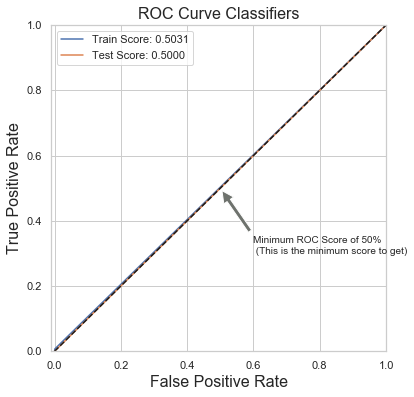

In [80]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, threshold = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, y_train_pred)))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()

#### Precision-Recall curve

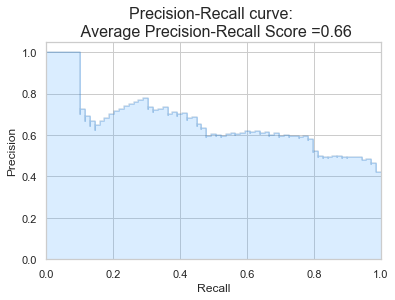

In [300]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_test_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)
plt.show()

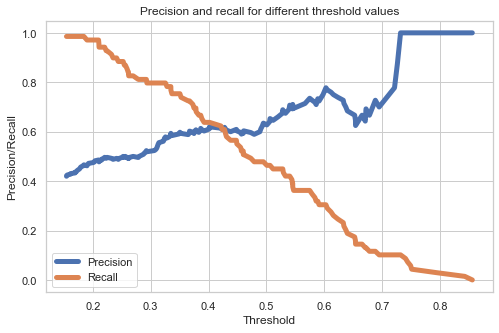

In [301]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.66')

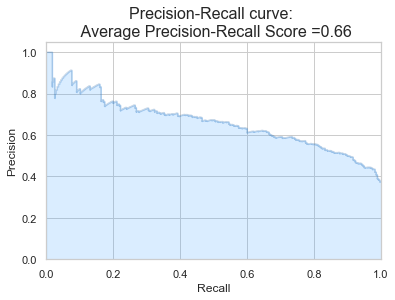

In [302]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_train_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_train,y_score)
average_precision = average_precision_score(y_train, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

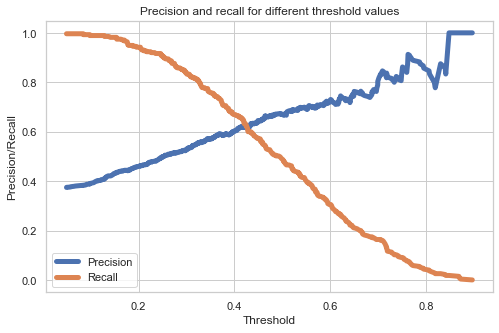

In [303]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

#### Summary

In [304]:
def ModelEvaluation(model,X_train,y_train,X_test,y_test,name):
    print('Model Evaluation of ' + name)

    print('-----------------------------------------------------------')
    print('Train set')
    print('Accuracy: ', accuracy_score(y_train, y_train_pred))
    print('ROC AUC Score: ', roc_auc_score(y_train, y_train_pred))
    cm_df = pd.DataFrame(confusion_matrix(y_train,y_train_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_train, y_train_pred))
    
    print('-----------------------------------------------------------')
    print('Test set')
    print('Accuracy: ', accuracy_score(y_test, y_test_pred))
    print('ROC AUC Score: ', roc_auc_score(y_test, y_test_pred))
    cm_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_test, y_test_pred))
    
ModelEvaluation(model,X_train,y_train,X_test,y_test,'Logistic Regression')

Model Evaluation of Logistic Regression
-----------------------------------------------------------
Train set
Accuracy:  0.7212449255751014
ROC AUC Score:  0.674333855799373
Confusion matrix
Predicted    0    1
Actual             
0          398   66
1          140  135
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       464
           1       0.67      0.49      0.57       275

    accuracy                           0.72       739
   macro avg       0.71      0.67      0.68       739
weighted avg       0.71      0.72      0.71       739

-----------------------------------------------------------
Test set
Accuracy:  0.7027027027027027
ROC AUC Score:  0.6572338830584707
Confusion matrix
Predicted   0   1
Actual           
0          97  19
1          36  33
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       116
           1       0.63      0.48      0.55        69

    accuracy   

### Tuning hyper-parameters

#### Apply Grid search and KFold Cross Validation

In [174]:
# Specify parameters
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid_search = GridSearchCV(LogisticRegression(), params, cv = 10, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=libli

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............
[CV]  C=1, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=1, multi_class=ovr, penalty=l1, solver=liblinear ..............

[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..............
[CV]  C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.001, multi_class=ovr, penalty=l2, solver=lbfgs ..........

[CV]  C=0.1, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV] . C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, multi_class=ovr, penalty=l2, solver=lbfgs ................
[CV

[CV]  C=10, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=newton-cg .............
[CV]  C=10, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[CV] .. C=10, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=10, multi_class=ovr, penalty=l2, solver=lbfgs .................
[C

[CV]  C=1000, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=newton-cg, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ...............
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ...............
[CV]  C=1000, multi_class=ovr, penalty=l2, solver=lbfgs, total=   0.1s
[CV] C=1000, multi_class=ovr, penalty=l2, solver=lbfgs ..

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   11.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                       

#### Best model

In [175]:
grid_search.best_params_

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}

In [176]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Rerun with the best model

In [177]:
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 69.01% (+/- 7.01%)


In [178]:
scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 69.41% (+/- 6.05%)


In [179]:
scores

array([0.66216216, 0.68918919, 0.71621622, 0.74324324, 0.67567568,
       0.7027027 , 0.68918919, 0.74324324, 0.66216216, 0.65753425])

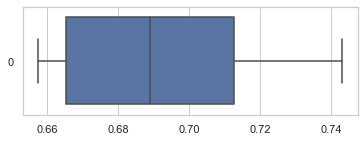

In [180]:
plt.figure(figsize=(6,2))
sns.boxplot(data=scores, orient='h')
plt.show()

In [181]:
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
prob_train_pred = best_model.predict_proba(X_train)

y_test_pred = best_model.predict(X_test)
prob_test_pred = best_model.predict_proba(X_test)

In [182]:
LogisticSummaryTable(best_model, X_train)

,FeatureName,Coefficient,Odds_ratio
40,RIDAGEYR,1.793589,6.010985
24,LBDSUASI,1.543197,4.679526
30,BMXARML,1.315318,3.725934
29,LBDEONO,0.874328,2.397265
16,LBXMOPCT,0.843852,2.325307
26,LBXSGL,0.665635,1.945726
19,LBDBANO,0.608463,1.837605
4,LBXSGTSI,0.558799,1.748571
37,BMXARMC,0.558663,1.748334
13,LBXBAPCT,0.450690,1.569395


In [183]:
ModelEvaluation(best_model,X_train,y_train,X_test,y_test,'LogisticRegression')

Model Evaluation of LogisticRegression
-----------------------------------------------------------
Train set
Accuracy:  0.7253044654939107
ROC AUC Score:  0.678307210031348
Confusion matrix
Predicted    0    1
Actual             
0          400   64
1          139  136
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       464
           1       0.68      0.49      0.57       275

    accuracy                           0.73       739
   macro avg       0.71      0.68      0.69       739
weighted avg       0.72      0.73      0.71       739

-----------------------------------------------------------
Test set
Accuracy:  0.7135135135135136
ROC AUC Score:  0.6687906046976512
Confusion matrix
Predicted   0   1
Actual           
0          98  18
1          35  34
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       116
           1       0.65      0.49      0.56        69

    accuracy    

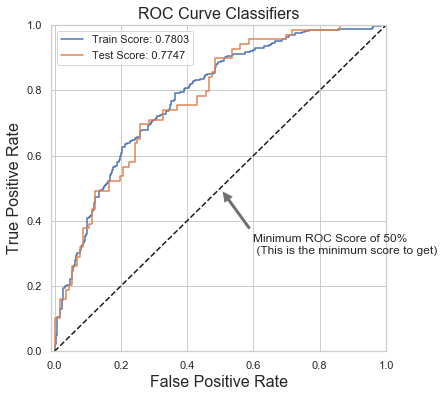

In [184]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()

In [185]:
y_score = best_model.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)

precision_recall_df = pd.DataFrame([precision[0:len(threshold)],recall[0:len(threshold)],threshold]).T
precision_recall_df.columns = ['precision','recall','threshold']
precision_recall_df.head(6)

,precision,recall,threshold
0,0.408284,1.000000,-1.814109
1,0.404762,0.985507,-1.795391
2,0.407186,0.985507,-1.773455
3,0.409639,0.985507,-1.771484
4,0.412121,0.985507,-1.723639
5,0.414634,0.985507,-1.700850


Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.67')

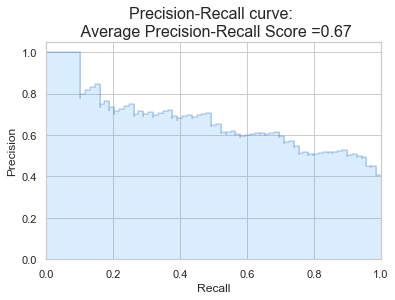

In [186]:
plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

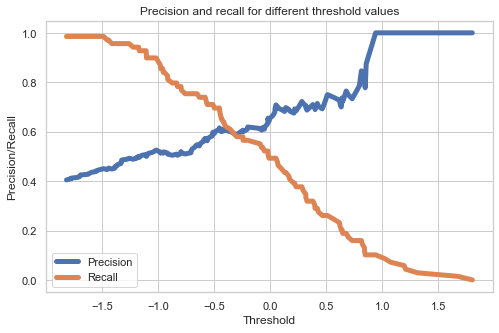

In [187]:
sns.set(style = 'whitegrid',context = 'notebook')
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()